In [47]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns


Config = {

    #'boosters' : ['No-boost MA-PIA', 'Stiff-boost MA-PIA 1e6', 'No-boost WS-MA-PIA', 'Stiff-boost WS-MA-PIA 1e6', 'Stiff-boost CVaR-MA-PIA 1e6', 'No-boost CVaR-MA-PIA']
    'boosters' : ['No-boost WS-MA-PIA', 'No-boost MA-PIA', 'Stiff-boost WS-MA-PIA 1e6', 'Stiff-boost CVaR-MA-PIA 1e6', 'No-boost CVaR-MA-PIA', 'Stiff-boost MA-PIA 1e6']
}


Setups = {
    'Stiff-boost MA-PIA 1e6' : {
        'sboost' : 1e6, 
        'ansatz' : 'MA-PIA',
        'stepsize' : 0.25, 
        'shots' : 1000
    }, 
    'No-boost MA-PIA' : {
        'sboost' : 0, 
        'ansatz' : 'MA-PIA',
        'stepsize' : 0.25, 
        'shots' : 1000
    },
    'No-boost WS-MA-PIA' : {
        'sboost' : 0, 
        'ansatz' : 'WS-MA-PIA',
        'stepsize' : 0.25, 
        'shots' : 1000
    }, 
    'Stiff-boost WS-MA-PIA 1e6' : {
        'sboost' : 1e6, 
        'ansatz' : 'WS-MA-PIA', 
        'stepsize' : 0.25, 
        'shots' : 1000
    },
    'Stiff-boost CVaR-MA-PIA 1e6' : {
        'sboost' : 1e6, 
        'ansatz' : 'CVaR-MA-PIA', 
        'stepsize' : 0.25, 
        'shots' : 1000
    },
    'No-boost CVaR-MA-PIA' : {
        'sboost' : 0, 
        'ansatz' : 'CVaR-MA-PIA',
        'stepsize' : 0.25, 
        'shots' : 1000
    }
    # 'Stiff-boost MA-PIA 1e12' : {
    #     'sboost' : 1e12, 
    #     'ansatz' : 'MA-PIA', 
    #     'stepsize' : 0.25, 
    #     'shots' : 1000
    # }
}

data = dict()

source = 'data/benchmark/Sboost_{sboost}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv'

for i in range (len(Config['boosters'])): 
    booster = Config['boosters'][i]
    try:
        dataset = pd.read_csv(source.format(sboost = Setups[booster]['sboost'], ansatz = Setups[booster]['ansatz'], stepsize = Setups[booster]['stepsize'], shots = Setups[booster]['shots']))
        data[Config['boosters'][i]] = dataset
    except:
        print(f'no dataset for {source.format(sboost = Setups[booster]['sboost'], ansatz = Setups[booster]['ansatz'], stepsize = Setups[booster]['stepsize'], shots = Setups[booster]['shots'])}')
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id (int)                  601 non-null    int64  
 1   Valid (int)               601 non-null    int64  
 2   Updated (str)             601 non-null    object 
 3   Matrix (mat)              601 non-null    object 
 4   Size (int)                601 non-null    int64  
 5   Type (str)                601 non-null    object 
 6   Rank (int)                601 non-null    int64  
 7   Density (flt)             601 non-null    float64
 8   Stiffness (flt)           601 non-null    float64
 9   Penalty (flt)             601 non-null    float64
 10  Sboost (flt)              601 non-null    float64
 11  Test_solver (str)         601 non-null    object 
 12  Test (flt)                601 non-null    float64
 13  Test_state (vec)          601 non-null    object 
 14  Test_itera

None

In [2]:

success_rates = dict()
average_iterations = dict()
approximation_ratios = dict()


success_rates_errs = dict()
average_iterations_errs = dict()
approximation_ratios_errs = dict()

iterations = dict()

for booster in Config['boosters']: 
    #print(booster)
    success_rates[booster] = 0
    average_iterations[booster] = 0 
    approximation_ratios[booster] = 0 
    iterations[booster] = []
    booster_data = data[booster]
    
    iterations[booster] = booster_data[(booster_data['Train_iterations_1 (int)'] < 100) & (booster_data['Train_iterations_1 (int)'] > 0)]['Train_iterations_1 (int)']
    average_iterations[booster] = np.mean(booster_data[(booster_data['Train_iterations_1 (int)'] < 50) & (booster_data['Train_iterations_1 (int)'] > 0)]['Train_iterations_1 (int)'])
    
    print(len(booster_data[(booster_data['Train_iterations (int)'] < 102) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
    approximation_ratios[booster] = np.mean(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    success_rates[booster] = len(booster_data[booster_data['Train_iterations (int)'] < 101]) / len(booster_data)


    average_iterations_errs[booster] = np.std(booster_data['Train_iterations (int)'])
    approximation_ratios_errs[booster] = np.std(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    
    

600
600
600
600
600


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (3, 21).

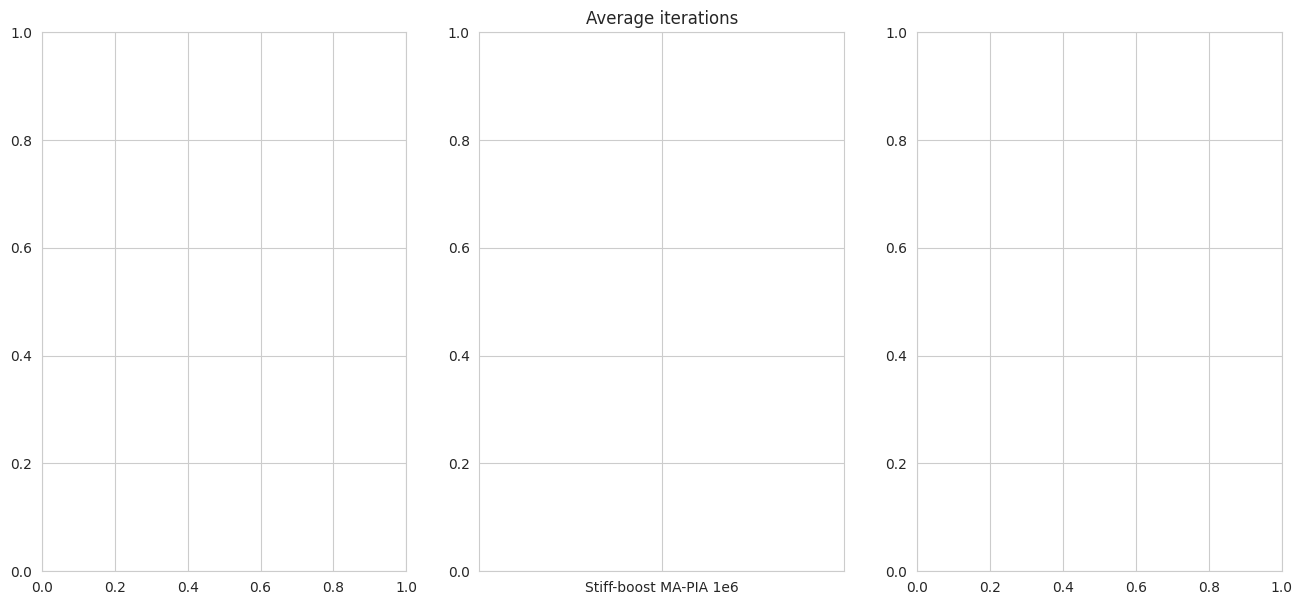

In [113]:
fig = plt.figure(figsize = (16, 7))

sns.set_style('whitegrid')

suc_ax = fig.add_subplot(131)
iter_ax = fig.add_subplot(132)
approx_ax = fig.add_subplot(133)


iter_ax.set_title('Average iterations')
iter_ax.bar(Config['boosters'], height = average_iterations.values())

approx_ax.set_title('Approximation ratio')
approx_ax.bar(Config['boosters'], height = approximation_ratios.values())

suc_ax.bar(Config['boosters'], height = success_rates.values())

plt.show()

In [100]:

success_rates = dict()
average_iterations = dict()
approximation_ratios = dict()


success_rates_errs = dict()
average_iterations_errs = dict()
approximation_ratios_errs = dict()

iterations = dict()

#limits = [10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
limits = np.arange(0, 102, step = 2)
for booster in Config['boosters']: 
    #print(booster)
    success_rates[booster] = []
    average_iterations[booster] = []
    approximation_ratios[booster] = []
    average_iterations_errs[booster] = []
    booster_data = data[booster]
  
    iterations[booster] = []

    for limit in limits: 
        average_iterations[booster].append(np.mean(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Test (flt)'] == booster_data['Train (flt)'])]['Train_iterations (int)']))
        success_rates[booster].append(len(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train (flt)'] == booster_data['Test (flt)'])]) / len(booster_data))
        #average_iterations_errs[booster].append(np.std(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
        approximation_ratios[booster].append(np.mean((booster_data[(booster_data['Train_iterations (int)'] < limit)]['Train (flt)'] - booster_data[booster_data['Train_iterations (int)'] < limit]['Test (flt)']) / booster_data[booster_data['Train_iterations (int)'] < limit]['Test (flt)']))
        #[booster].append((booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
        print(len(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
    approximation_ratios[booster] = np.mean(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    
    iterations[booster] = booster_data[(booster_data['Train_iterations (int)'] < 101)]['Train_iterations (int)']


    # average_iterations_errs[booster] = np.std(booster_data['Train_iterations (int)'])
    # approximation_ratios_errs[booster] = np.std(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    


0
12
98
177
221
267
303
331
348
375
390
404
421
429
436
446
453
459
468
471
475
478
483
491
494
500
504
507
509
512
515
519
519
521
522
524
527
528
529
529
531
533
534
535
535
535
535
536
536
537
537
0
2
44
99
156
192
229
254
275
297
312
320
336
348
362
368
378
385
389
392
394
399
402
407
408
410
413
417
417
417
420
421
421
424
425
427
430
432
433
433
436
436
436
437
438
442
442
444
446
447
447
0
6
88
159
207
262
308
336
359
380
394
405
421
431
439
443
449
455
463
468
474
480
483
487
490
493
496
500
504
508
510
513
515
517
520
521
523
523
525
527
527
529
529
531
531
532
532
532
533
535
535
0
0
0
0
5
11
20
36
56
69
88
111
132
151
173
186
208
221
244
262
276
290
302
319
330
340
346
354
361
367
376
384
392
397
403
406
411
416
420
426
430
435
442
444
445
447
451
454
456
457
458
0
12
98
177
221
267
303
331
348
375
390
404
421
429
436
446
453
459
468
471
475
478
483
491
494
500
504
507
509
512
515
519
519
521
522
524
527
528
529
529
531
533
534
535
535
535
535
536
536
537
537
0
7
60
119
160


In [21]:

# xpos = np.arange(3)

# width = 0.1

# limits = np.arange(10, 50, 5)

# for i in range(len(limits)):

#     plt.bar(xpos - i * width, [average_iterations[booster][i] for booster in Config['boosters']], width, color = 'royalblue')

# plt.xticks(xpos - 0.2, Config['boosters'])
# plt.ylim(ymin = 4)

In [65]:
print(approximation_ratios['Stiff-boost MA-PIA 1e6'])

0.02016131319852292


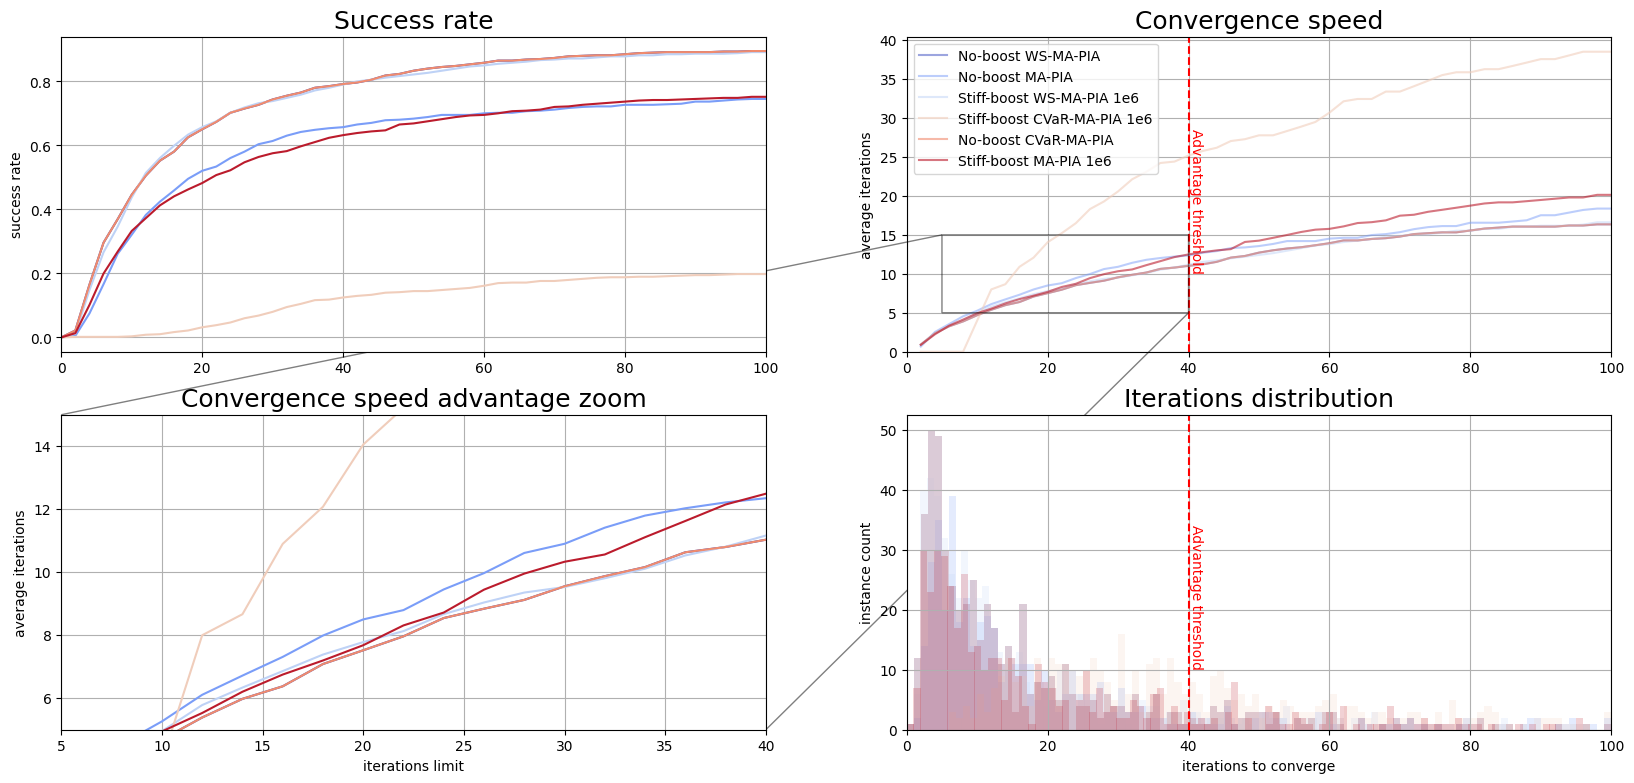

In [133]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize = (20, 9))

iterax = fig.add_subplot(222)
sucax = fig.add_subplot(221)
iterstat = fig.add_subplot(224)
advantageax = fig.add_subplot(223)
colors = [plt.cm.coolwarm(i) for i in range(0, 256, 50)]

alphas = [0.5, 0.5, 0.5, 0.6, 0.6, 0.6]


for i in range(len(Config['boosters'])):
    
    # if (Config['boosters'][i] == 'stiffboosting 1e6'):
    #     iterax.bar(limits, height = average_iterations[Config['boosters'][i]], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i], zorder = 5)
    
    # else:
    iterax.plot(limits, average_iterations[Config['boosters'][i]], color = colors[i], label = Config['boosters'][i], alpha = alphas[i])
    
# plt.bar(limits, height = average_iterations['no-boost'], color = 'red', width = 5, label = 'no-boost', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e8'], color = 'orange', width = 4, label = r'stiff-boosting $\alpha = 1e8$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e6'], color = 'yellow', width = 2, label = r'stiff-boosting $\alpha = 1e6$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e4'], color = 'green', width = 3, label = r'stiff-boosting $\alpha = 1e4$', alpha = 0.5)

#iterax.set_xticks(limits)

iterax.set_title('Convergence speed', fontsize = 18)
iterax.set_ylabel('average iterations')
# iterax.set_xlabel('iterations limit')
iterax.set_xlim(xmin = 0)
iterax.set_ylim(ymin = 0)
iterax.grid()
iterax.legend()

colors = [plt.cm.coolwarm(i) for i in range(0, 256, 50)]

alphas = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

for i in range(len(Config['boosters'])):
        
    if (Config['boosters'][i] == 'stiffboosting 1e6'):
        sucax.plot(limits, success_rates[Config['boosters'][i]], color = colors[i], label = Config['boosters'][i], zorder = 5)
    
    else:
        sucax.plot(limits, success_rates[Config['boosters'][i]], color = colors[i], label = Config['boosters'][i])

# plt.bar(limits, height = average_iterations['no-boost'], color = 'red', width = 5, label = 'no-boost', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e8'], color = 'orange', width = 4, label = r'stiff-boosting $\alpha = 1e8$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e6'], color = 'yellow', width = 2, label = r'stiff-boosting $\alpha = 1e6$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e4'], color = 'green', width = 3, label = r'stiff-boosting $\alpha = 1e4$', alpha = 0.5)

#sucax.set_xticks(limits)

sucax.set_title('Success rate', fontsize = 18)
sucax.set_ylabel('success rate')
# sucax.set_xlabel('iterations limit')
sucax.set_xlim(xmin = 0, xmax = 100)
sucax.grid()
iterax.legend()

for i in range(len(Config['boosters'])): 

    iterstat.hist(iterations[Config['boosters'][i]], bins = 100, color = colors[i], alpha = alphas[i], width = 1, label = Config['boosters'][i])
iterax.axvline(x = 40, linestyle = '--', color = 'r')
iterax.text(x= 41, y=0.5 * 20, s="Advantage threshold", rotation=270, va='bottom', ha='center', color='r')
iterax.set_xlim(xmax = 100)
iterstat.axvline(x = 40, linestyle = '--', color = 'r')
iterstat.text(x= 41, y=0.5 * 20, s="Advantage threshold", rotation=270, va='bottom', ha='center', color='r')
iterstat.set_xlim(xmin = 0, xmax = 100)
iterstat.set_ylabel('instance count')
iterstat.set_xlabel('iterations to converge')
iterstat.set_title('Iterations distribution', fontsize = 18)

for i in range(len(Config['boosters'])):
    
    # if (Config['boosters'][i] == 'stiffboosting 1e6'):
    #     iterax.bar(limits, height = average_iterations[Config['boosters'][i]], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i], zorder = 5)
    
    # else:
    advantageax.plot(limits, average_iterations[Config['boosters'][i]], color = colors[i], label = Config['boosters'][i])
    
advantageax.set_xlim(xmin = 5, xmax = 40)
advantageax.set_ylim(ymin = 5, ymax = 15)
advantageax.grid()
advantageax.set_title('Convergence speed advantage zoom', fontsize = 18)
advantageax.set_xlabel('iterations limit')
advantageax.set_ylabel('average iterations')
iterax.indicate_inset_zoom(advantageax, edgecolor="black")
iterstat.grid()
plt.savefig('figs/heuristics_comparation.png', dpi = 1000)

In [131]:
points = [4, 10, 20, 30, 38]

for i in range (1, 20):
    #if (limits[i] in points):
        print(f'Iterations : {limits[i]} | Sboost speed up: {np.abs((average_iterations['Stiff-boost MA-PIA 1e6'][i] - average_iterations['No-boost MA-PIA'][i]) / average_iterations['No-boost MA-PIA'][i]) * 100} | Sboost success_rate : {success_rates['Stiff-boost MA-PIA 1e6'][i]} | WS : {np.abs((average_iterations['No-boost WS-MA-PIA'][i] - average_iterations['No-boost MA-PIA'][i]) / average_iterations['No-boost MA-PIA'][i]) * 100} | WS success rate : {success_rates['No-boost WS-MA-PIA'][i]} | CVaR : {np.abs((average_iterations['No-boost CVaR-MA-PIA'][i] - average_iterations['No-boost MA-PIA'][i]) / average_iterations['No-boost MA-PIA'][i]) * 100} | CVaR success rate : {success_rates['No-boost CVaR-MA-PIA'][i]}')

for booster in Config['boosters']:
    print(f' booster {booster} : {approximation_ratios[booster]}')
    average_iterations[booster] = np.array(average_iterations[booster])
#print(average_iterations['Stiff-boosting MA-PIA 1e6'])
print(np.mean(np.abs((average_iterations['No-boost WS-MA-PIA'][1:] - average_iterations['No-boost MA-PIA'][1:]) / average_iterations['No-boost MA-PIA'][1:]) * 100))

Iterations : 2 | Sboost speed up: 31.250000000000007 | Sboost success_rate : 0.013311148086522463 | WS : 38.461538461538474 | WS success rate : 0.021630615640599003 | CVaR : 38.461538461538474 | CVaR success rate : 0.021630615640599003
Iterations : 4 | Sboost speed up: 11.993097497842971 | Sboost success_rate : 0.10149750415973377 | WS : 6.698564593301426 | WS success rate : 0.16472545757071547 | CVaR : 6.698564593301426 | CVaR success rate : 0.16472545757071547
Iterations : 6 | Sboost speed up: 5.602636534839922 | Sboost success_rate : 0.19966722129783693 | WS : 7.954040500222181 | WS success rate : 0.2961730449251248 | CVaR : 7.954040500222181 | CVaR success rate : 0.2961730449251248
Iterations : 8 | Sboost speed up: 9.313290533604757 | Sboost success_rate : 0.26788685524126454 | WS : 14.421985010220306 | WS success rate : 0.36938435940099834 | CVaR : 14.421985010220306 | CVaR success rate : 0.36938435940099834
Iterations : 10 | Sboost speed up: 6.064468503937003 | Sboost success_rat

In [130]:
s = 0
for i in range (20):
    a = np.abs((average_iterations['No-boost WS-MA-PIA'][1:] - average_iterations['No-boost MA-PIA'][1:]) / average_iterations['No-boost MA-PIA'][1:])[i] * 100
    s += a
m = np.mean(np.abs((average_iterations['No-boost WS-MA-PIA'][1:] - average_iterations['No-boost MA-PIA'][1:]) / average_iterations['No-boost MA-PIA'][1:])) * 100
print(m)
print(s / 20)

8.86060484210337
12.744696247988827


/tmp/ipykernel_1269789/3343723073.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


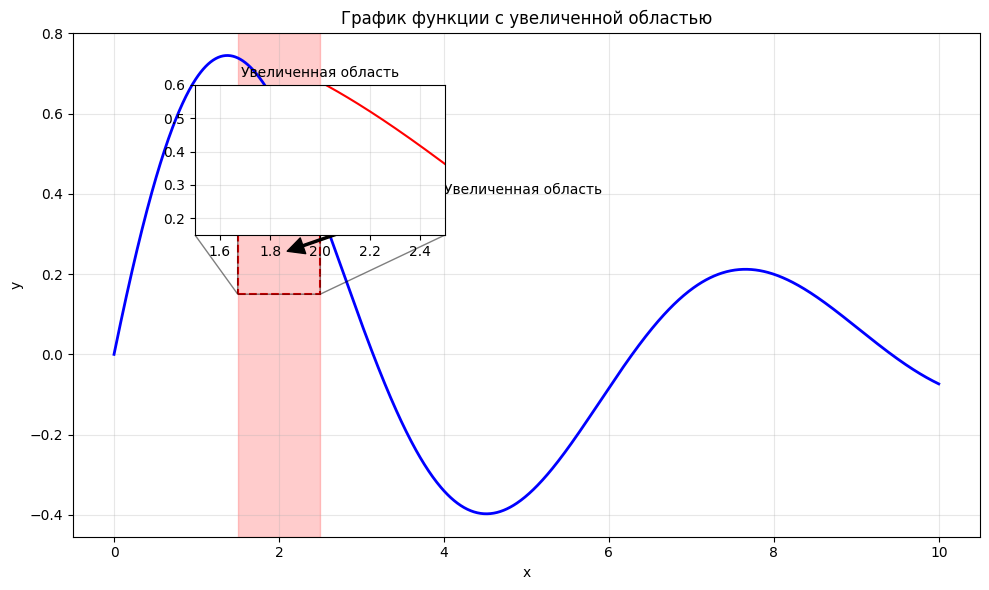

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем данные для примера
x = np.linspace(0, 10, 1000)
y = np.sin(x) * np.exp(-x/5)

# Создаем фигуру и основную ось
fig, ax = plt.subplots(figsize=(10, 6))

# Рисуем основной график
ax.plot(x, y, 'b-', linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('График функции с увеличенной областью')
ax.grid(True, alpha=0.3)

# Определяем область для увеличения (окрестность точки x=2)
zoom_x_min, zoom_x_max = 1.5, 2.5
zoom_y_min, zoom_y_max = 0.15, 0.6

# Показываем область увеличения на основном графике
ax.axvspan(zoom_x_min, zoom_x_max, color='red', alpha=0.2)
ax.annotate('Увеличенная область', xy=(2, 0.25), xytext=(4, 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Создаем вставку с увеличенной областью
# [left, bottom, width, height] в долях от размера фигуры
ax_inset = fig.add_axes([0.2, 0.6, 0.25, 0.25])

# Рисуем увеличенную область
ax_inset.plot(x, y, 'r-', linewidth=1.5)
ax_inset.set_xlim(zoom_x_min, zoom_x_max)
ax_inset.set_ylim(zoom_y_min, zoom_y_max)
ax_inset.grid(True, alpha=0.3)
ax_inset.set_title('Увеличенная область', fontsize=10)

# Добавляем прямоугольник на основном графике, показывающий область увеличения
rect = plt.Rectangle((zoom_x_min, zoom_y_min), 
                     zoom_x_max - zoom_x_min, 
                     zoom_y_max - zoom_y_min,
                     fill=False, color='red', linestyle='--', linewidth=1.5)
ax.add_patch(rect)

# Соединяем вставку с основной областью линиями
# Это необязательно, но улучшает визуальную связь
ax.indicate_inset_zoom(ax_inset, edgecolor="black")

plt.tight_layout()
plt.show()

In [148]:
from logger import Logger 

template = pd.read_csv('data/template_benchmark.csv')


ids = np.arange(1, 601)

def hamming (a : np.ndarray, b : np.ndarray):
    distance = 0
    for i in range(len(a)):
        if (a[i] != b[i]):
            distance += 1

    return distance

distances = dict()
for booster in Config['boosters']:
    log = Logger(log_template = template, log_path = source.format(sboost = Setups[booster]['sboost'], ansatz = Setups[booster]['ansatz'], stepsize = Setups[booster]['stepsize'], shots = Setups[booster]['shots']))
    distances[booster] = []
    for id in ids: 

        line = log.read(id)

        test_sol = line['Test_state (vec)']
        train_sol = line['Train_state (vec)']  

        distances[booster].append(hamming(test_sol, train_sol))


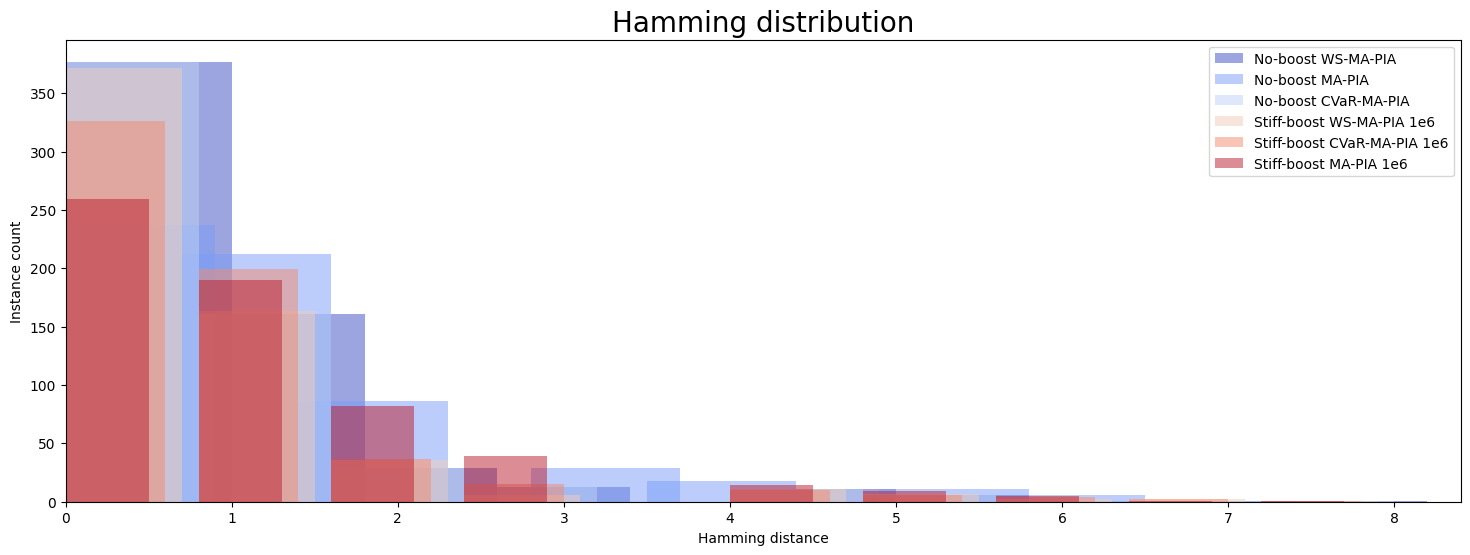

In [173]:
plt.figure(figsize = (18,6))
# plt.grid()
Config['boosters'] = ['No-boost WS-MA-PIA', 'No-boost MA-PIA', 'No-boost CVaR-MA-PIA', 'Stiff-boost WS-MA-PIA 1e6', 'Stiff-boost CVaR-MA-PIA 1e6', 'Stiff-boost MA-PIA 1e6']

for i in range(len(Config['boosters'])):
    plt.hist(distances[Config['boosters'][i]], bins = 10, color = colors[i], width = 1 - i/10, label = Config['boosters'][i], alpha = 0.5)
plt.title('Hamming distribution', fontsize = 20)
plt.legend()
plt.xlim(xmin = 0)
plt.xlabel('Hamming distance')
plt.ylabel('Instance count')
plt.savefig('figs/Hamming_distribution.png', dpi = 1000)

Text(0, 0.5, 'instance count')

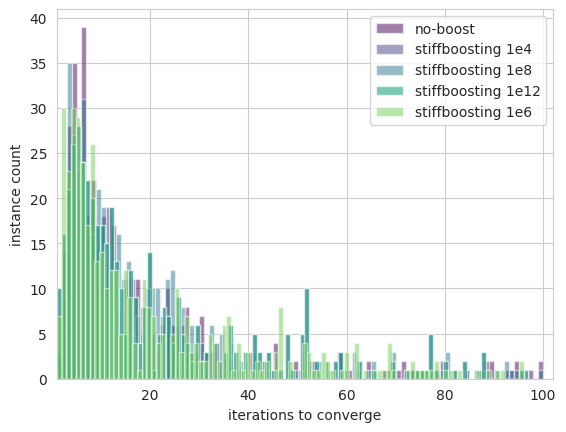

In [49]:

for i in range(len(Config['boosters'])): 

    plt.hist(iterations[Config['boosters'][i]], bins = 100, color = colors[i], alpha = alphas[i], width = 1, label = Config['boosters'][i])


# plt.hist(iterations['no-boost'], bins = 100, color = 'red', alpha = 0.5, width = 1,)
# plt.hist(iterations['stiffboosting 1e4'], bins = 100, color = 'green', alpha = 0.5, width = 1)
# plt.hist(iterations['stiffboosting 1e6'], bins = 100, color = 'orange', alpha = 0.5, width = 1)
# plt.hist(iterations['stiffboosting 1e8'], bins = 100, color = 'yellow', alpha = 0.5, width = 1)
plt.legend()
plt.xlim(xmin = 1, xmax = 102)
# ax_inset = inset_axes(iterax, 
#                       width="30%",   # ширина 30% от основного графика
#                       height="30%",  # высота 30% от основного графика
#                       loc='upper left')  # расположение в правом верхнем углу

# Рисуем на вставке увеличенную часть данных

# left = 3
# right = 6
# for i in range(len(Config['boosters'])):
    
#     if (Config['boosters'][i] == 'stiffboosting 1e6'):
#         ax_inset.bar(limits[left:right], height = average_iterations[Config['boosters'][i]][left:right], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i], zorder = 5)
    
#     else:
#         ax_inset.bar(limits[left:right], height = average_iterations[Config['boosters'][i]][left:right], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i])

# sublimits = np.arange(15, 40, 5)
# ax_inset.set_ylim(ymin = 8)
# ax_inset.set_title('Увеличенная область')

plt.xlabel('iterations to converge')
plt.ylabel('instance count')